In [3]:
from __future__ import division
%matplotlib nbagg
import os, sys
import numpy as np
import pandas as pd
from collections import defaultdict
#from python_latexify import latexify, format_axes
import matplotlib
#matplotlib.rcParams.update(latexify())


#font = {'family' : 'normal',
#        'weight' : 'bold',
#        'size'   : 14}
#matplotlib.rc('font', **font)
import matplotlib.pyplot as plt

In [4]:
DATA = "data/"
PLOTS = "results/final_figures-20150429/plots-0.1/"
TABLES = "results/final_figures-20150429/tables-0.1/"
if not os.path.exists(PLOTS):
    os.makedirs(PLOTS)
if not os.path.exists(TABLES):
    os.makedirs(TABLES)

# EXP3 IPID TOR PLOT

In [5]:
diff_list = defaultdict(int)

diff_list['Azerbaijan'] = [7,7,9,6,7,8,6,8,7,6,14,5,5,9,7,6
,7,8,5,5,7,7,7,3,5,9,7,7,7,7,8,4,7,11,6,7,4,9,4,9,7,7,10,9,7,11,12,5,5,7,5,6,8,7
,7,9,7,3,8,10,30,25,26,25,24,29,26,27,27,24,30,29,29,26,29,27,30,32,37,31,30,28,
28,26,26,26,25,26,26,27,24,24,26,26,27,27,23,28,29,36,28,32,30,28,24,27,26,25,25
,24,26,26,28,27,25,25,23,28,25,24]
diff_list['Venezuela'] = [2,1,0,2,0,0,2,0,0,2,0,1,2,1,3,11,
2,1,3,2,2,1,4,3,1,2,1,1,2,1,6,1,3,1,3,0,2,2,1,0,1,0,2,2,1,0,43,1,2,3,6,4,3,3,3,5
,8,4,1,1,4,3,0,3,0,1,0,0,0,0,0,1,1,3,1,1,0,107,0,1,0,1,1,0,6,2,2,0,11,3,3,0,0,0,
0,0,5,2,0,0,0,0,2,0,1,0,1,2,88,0,3,1,0,4,0,2,1,1,0,None]
diff_list['Cuba'] = [2,1,1,1,2,1,1,1,1,1,1,1,1,
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,1,1,1,1,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,
41,41,41,41,41,41,41,41,41,41,41,41,41,41,42,42,43,43,43,41,41,41,41,43,43,42,43
,43,43,43,42,41,41,41,41,41,41,41]


<IPython.core.display.Javascript object>


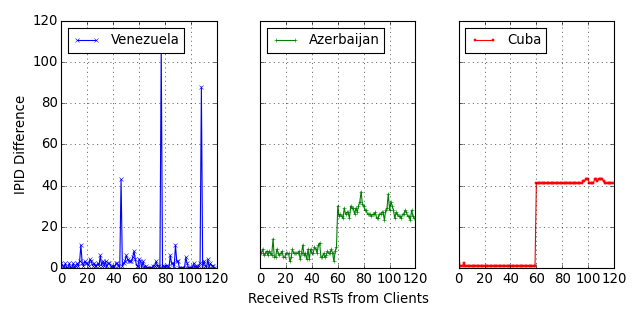

In [20]:
fig1, ax1arr = plt.subplots(1,3, sharey=True, figsize=(8,4))
m = ['x', '+', '.']
c = 'bgr'
#ls = ['-.', '--', '-']
i = 0
for k,v in diff_list.iteritems():
    ax1 = ax1arr[i]
    ax1.plot(range(len(v)), v, marker=m[i], markersize=4, lw=1, label=k, color=c[i])
    i += 1
    ax1.grid(1)
    
    ax1.legend(loc=2, fontsize=12)
ax1arr[0].set_ylabel("IPID Difference")
ax1arr[1].set_xlabel("Received RSTs from Clients")
fig1.tight_layout()
#format_axes(ax1)
fig1.show()
fig1.savefig(PLOTS + "exp3cases")
fig1.savefig(PLOTS + "exp3cases.pdf")

# GLOBAL IPID ROUTERS CDF

In [273]:
gr = pd.read_csv(DATA + "statinfoGlobal2Rs.txt",
                 names=["Country","GlobalRouters","AllRouters","percent"]).set_index("Country")
gr.head()

,GlobalRouters,AllRouters,percent
Country,,,
GB,878,12912,6
CN,9388,37993,24
IN,699,4960,14
US,8351,99416,8
ID,203,2362,8


<IPython.core.display.Javascript object>


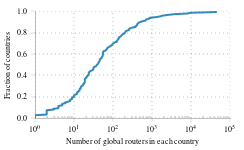

In [274]:
# CDF of number of unique global routers per country
fig2,ax2 = plt.subplots(1,1)
data = list(gr["GlobalRouters"])
data.sort()
ydata = [float(x) / float(len(data)) for x in range(len(data))]
ax2.plot(data,ydata, lw=2)

#gr["GlobalRouters"].hist(ax=ax2)
ax2.set_xscale("log")
ax2.set_xlabel("Number of global routers in each country")
ax2.set_ylabel("Fraction of countries")
ax2.grid(1)
fig2.tight_layout()
format_axes(ax2)
fig2.savefig(PLOTS + "globalIPs-per-country")
fig2.savefig(PLOTS + "globalIPs-per-country.pdf")

#<font color='red'>KNEE for SE/US

In [7]:
## GET CENSORSHIP INFO
def get_ratios(df_count):
    ''' assume df_count is indexed'''
    #df_count = dfin.groupby(['sIP', 'domain', 'subcat', 'slash24',
    #'country', 'case'])['port'].count().unstack().fillna(0)
    df_count['tot'] = df_count.sum(axis=1)
    
    df_count['err'] = 0
    if (0 in df_count.columns):
        df_count['err']+= df_count[0]
    if (4 in df_count.columns):
        df_count['err']+= df_count[4]

    df_count['tot'] = df_count['tot'] - df_count['err']
    
    if 1 in df_count.columns:
        df_count['case1'] = df_count[1]/df_count['tot']
    if 2 in df_count.columns:
        df_count['case2'] = df_count[2]/df_count['tot']
    if 3 in df_count.columns:
        df_count['case3'] = df_count[3]/df_count['tot']
    return df_count

def get_censorship_by_country_sIP(df_val, dimension='censorship'):
    censorship = df_val.groupby(['sIP', 'domain', 'subcat',
                                 'country', 'case'])['port'].count().unstack().fillna(0)
    get_ratios(censorship)
    global_censorship = df_val.groupby(['sIP', 'domain',
                                        'subcat', 'case'])['port'].count().unstack().fillna(0)
    get_ratios(global_censorship)
    if dimension == 'censorship':
        censor_country = (1 - censorship['case2']).unstack()
        censor_global = (1 - global_censorship['case2'])
    else:
        # dimension can be err, tot, case1, case2, case3, 1, 2, 3, 4, 0 apart from censorship
        censor_country = censorship[dimension].unstack()
        censor_global = global_censorship[dimension]
        
    censor_country['global'] = censor_global
    #censor_country= censor_country.reset_index()
    return censor_country

## sIP_subcat original

In [4]:
df_sIP_subcat_orig = pd.read_csv(DATA + "Servers_IMC.txt.original")
df_sIP_subcat_orig['subcat'] = df_sIP_subcat_orig['subcat'].apply(
    lambda x: x.replace('kids_and_teens', 'teens'))

## SANITY CHECK MEASUREMENTS: APR 12 DATA

In [5]:
df_mock = pd.read_pickle(DATA + "case_detected_all_20150412.pkl")

In [8]:
censorship = get_censorship_by_country_sIP(df_mock)[['US','SE']]
totals = get_censorship_by_country_sIP(df_mock, 'tot')[['US','SE']]
case1 = get_censorship_by_country_sIP(df_mock, 1)[['US','SE']]
case3 = get_censorship_by_country_sIP(df_mock, 3)[['US','SE']]

censorship['US-tot'] = totals['US']
censorship['SE-tot'] = totals['SE']
censorship['US-1'] = case1['US']
censorship['US-3'] = case3['US']
censorship['SE-1'] = case1['SE']
censorship['SE-3'] = case3['SE']

del totals, case1, case3

censorship = censorship.reset_index()
censorship.head()

country,sIP,domain,subcat,US,SE,US-tot,SE-tot,US-1,US-3,SE-1,SE-3
0,1.209.122.23,riseup.net,circum,0.053097,0.093750,113,32,1,5,0,3
1,103.6.182.20,agoda.com,world|recreation,0.527778,0.178571,144,56,66,10,4,6
2,104.130.112.72,express-vpn.com,vpn,0.090909,0.102041,55,49,0,5,0,5
3,104.16.5.13,change.org,society,0.988889,1.000000,90,60,0,89,0,60
4,104.16.7.118,petmd.com,health,1.000000,1.000000,96,48,1,95,0,48


In [9]:
len(df_mock['sIP'].unique())

474

In [10]:
df_censorship_US_SE = df_sIP_subcat_orig.merge(censorship[['sIP', 'US', 'US-tot', 'US-1', 'US-3',
                                                 'SE', 'SE-tot', 'SE-1', 'SE-3']], on='sIP')
del df_censorship_US_SE['subcat']

In [11]:
df_IP_reachability = pd.read_pickle("results/sIP_sanitize_20150426/" + "df_IP_reachability.pkl")
df_domain_IP_mapping = pd.read_pickle("results/sIP_sanitize_20150426/" + "df_domain_IP_mapping.pkl")
del df_domain_IP_mapping['subcat']

In [12]:
print len(df_IP_reachability), len(df_domain_IP_mapping), len(df_censorship_US_SE)

580 580 473


In [13]:
# merge in order to preserve COLUMNS order
df_temp = df_IP_reachability.merge( df_domain_IP_mapping, on=['sIP', 'domain'], how='outer' )
df_temp2 = df_temp.merge( df_censorship_US_SE, on=['sIP', 'domain'], how='outer' )
print df_temp2.columns

df_final = df_temp2.sort(columns=["US", "US-tot"], ascending=[False, False]).reset_index()
del df_final['index']
df_final.head()

Index([u'sIP', u'domain', u'subcat', u'dig_x', u'anycast', u'slash24', u'slash24_shared', u'dig', u'DNS_contains', u'http_domain', u'http_domain2', u'http_ipaddr1', u'http_ipaddr2', u'sIP_http_reach', u'US', u'US-tot', u'US-1', u'US-3', u'SE', u'SE-tot', u'SE-1', u'SE-3'], dtype='object')


,sIP,domain,subcat,dig_x,anycast,slash24,slash24_shared,dig,DNS_contains,http_domain,...,http_ipaddr2,sIP_http_reach,US,US-tot,US-1,US-3,SE,SE-tot,SE-1,SE-3
0,104.20.12.28,studentdoctor.net,[health],[],"CloudFlare, Inc. United States",104.20.12,1,"[104.20.13.28, 104.20.12.28]",True,403,...,301,True,1,101,1,100,1,29,0,29
1,90.216.128.5,sky.com,"[arts, regional, shopping]",[],-1,90.216.128,1,[90.216.128.5],True,200,...,302,True,1,98,46,52,1,43,0,43
2,104.16.7.118,petmd.com,[health],[],"CloudFlare, Inc. United States",104.16.7,1,"[104.16.7.118, 104.16.11.118, 104.16.9.118, 10...",True,403,...,301,True,1,96,1,95,1,48,0,48
3,141.101.113.126,planetminecraft.com,[games],[],"CloudFlare, Inc. European Union",141.101.113,1,"[190.93.240.126, 141.101.123.126, 190.93.241.1...",True,403,...,403,False,1,94,0,94,1,53,0,53
4,104.20.28.34,tunnelbear.com,[vpn],[],"CloudFlare, Inc. United States",104.20.28,2,"[104.20.29.34, 104.20.28.34]",True,200,...,302,True,1,87,0,87,1,47,0,47


## TRY: CUT OFF AT 0.1 THRESH

In [30]:
THRESH = 0.10
MEAS = 15

df_filtered = df_final[ (df_final['US-tot'] >= MEAS) & (df_final['SE-tot'] >= MEAS) ]
aggressive =  df_filtered [ (df_filtered['US'] <= THRESH) & (df_filtered['SE'] <= THRESH) ]

len(aggressive['sIP'].unique())

135

In [31]:
servers_imc = aggressive[['sIP', 'domain', 'subcat']].copy()
servers_imc['subcat'] = servers_imc['subcat'].apply(lambda x: "|".join(x))
servers_imc.to_csv("data/aggressive_drop_servers_imc.txt")

### 1. Reject http-IP reachability errors not in range (200,400) (except TorDirs) + Anything in cloudflare anycast confirmed 
- 'sIP_http_reach' == True or torDir
- anycast contains cloudflare
- go 580 --> 517

In [284]:
df_short = df_final[[u'sIP', u'domain', u'subcat', u'dig_x', u'anycast',
           u'DNS_contains', u'http_domain', u'http_domain2',
           u'sIP_http_reach',
           u'US', u'US-tot', u'US-1', u'US-3', 
           u'SE', u'SE-tot', u'SE-1', u'SE-3']].copy()

In [285]:
df_short['anycast'] = df_short['anycast'].replace({-1:''})
df_short['cloudflare'] = df_short['anycast'].apply(lambda x: 'CloudFlare' in x)

keep_HTTP_IP = df_short[ (df_short['sIP_http_reach'] == True) |
                    (df_short['domain'] == 'torDir')]

not_cloudflare = keep_HTTP_IP[keep_HTTP_IP['cloudflare'] == False]

print len(df_short[df_short['cloudflare'] == True])
print len(keep_HTTP_IP)
print len(not_cloudflare)
print len(df_short) -  len(keep_HTTP_IP)

25
541
517
39


#2. Reject domains with < 15 meas from BOTH US/SE (except tor/vpns)
- go 517 --> 387

In [286]:
def check_interesting_subcat(x):
    if ('vpn' in x) or ('circum' in x):
        return 1
    return 0

df = not_cloudflare
more_meas = df[ (df['US-tot'] >= 15) & (df['SE-tot'] >= 15)]
less_meas = df[ (df['US-tot'] < 15) | (df['SE-tot'] < 15) ].copy()
less_meas['important'] = less_meas['subcat'].apply(check_interesting_subcat)

In [287]:
print len(df), len(more_meas), len(less_meas), len(less_meas[less_meas['important']==1])

517 387 32 1


In [288]:
less_meas[less_meas['important']==1]

,sIP,domain,subcat,dig_x,anycast,DNS_contains,http_domain,http_domain2,sIP_http_reach,US,US-tot,US-1,US-3,SE,SE-tot,SE-1,SE-3,cloudflare,important
73,216.239.32.21,oneswarm.org,[circum],[any-in-2015.1e100.net.],Google Inc. United States,True,200,NaN,True,0.512195,41,0,21,0.928571,14,0,13,False,1


#3. REJECT UNREASONABLY HIGH CENSORED DOMAINS based on GT
- go 387 --> 297 (+1 from prev)
- draw CDF of censorship
- out of 387, those with [KNEE] censorship should be cut off
- 0.2 is based on CDF of censorship in US AND SE over all 387 websites

In [289]:
def getCDF(data):
    xdata = np.sort(data)
    ydata = [i/len(xdata) for i in range(len(xdata))]
    return xdata, ydata

In [290]:
fig1, ax1 = plt.subplots(1,1)

x,y = getCDF( list( more_meas['US']) )
ax1.plot(x,y, label='US', lw=2, marker='.', markevery=10)
x,y = getCDF( list( more_meas['SE']) )
ax1.plot(x,y, label='SE', lw=2, ls='--', marker='+', markevery=10)

ax1.axvline(0.2, color='k', ls='-.')

ax1.set_xlabel("censorship ratio per domain")
ax1.set_ylabel("CDF of domains")
ax1.grid(1)
ax1.legend(loc='best')
fig1.tight_layout()
format_axes(ax1)
fig1.savefig(PLOTS + "knee_plot_Apr12_20perc_cutoff")
fig1.savefig(PLOTS + "knee_plot_Apr12_20perc_cutoff.pdf")

<IPython.core.display.Javascript object>

### Reject: final output list of domains to consider (sanitized)

In [302]:
# accepted healthy sIPs with thresh 0.2
THRESH = 0.2
df_final = more_meas[ ( (more_meas['US'] <= THRESH) & (more_meas['SE'] <= THRESH) ) ]
#df_final[['sIP', 'domain', 'subcat']].to_csv('data/Servers_IMC_censorship15_healthy.txt', index=False)

print len(more_meas), len(df_final)

387 297


In [303]:
df_servers_IMC = pd.concat([df_final, less_meas[less_meas['important'] == 1]])
df_servers_IMC['subcat'] = df_servers_IMC['subcat'].apply(lambda x: "|".join(x))
print len(df_final), len(less_meas[less_meas['important'] == 1]), len(df_servers_IMC)

297 1 298


In [304]:
df_servers_IMC[['sIP', 'domain', 'subcat']].to_csv('data/Servers_IMC-fixed.txt', index=False)

#<font color='red'>TABLE of sIP vs Subcat, num_meas vs Subcats, sIP-gIP vs Subcats
- use updated servers IMC or old?

## sIP_subcat sanitized

In [3]:
# UPDATED SERVERS IMC
df_sIP_subcat = pd.read_csv("data/Servers_IMC-fixed.txt")
df_sIP_subcat['subcat'] = df_sIP_subcat['subcat'].apply(lambda x: x.replace('kids_and_teens', 'teens'))


subcat_duplicated = defaultdict(list)
for ix, row in df_sIP_subcat.iterrows():
    if len(row[2].split("|"))>1:
        shared = 1
    else:
        shared = 0
    for subcat in row[2].split("|"):
        if subcat == 'kids_and_teens':
            subcat = 'teens'
        subcat_duplicated['sIP'].append(row[0])
        subcat_duplicated['domain'].append(row[1])
        subcat_duplicated['subcat'].append(subcat)
        subcat_duplicated['shared'].append(shared)
df_sIP_subcat_disjoint = pd.DataFrame(subcat_duplicated)

#df_sIP_subcat_disjoint.to_csv("data/Servers_IMC_disjoint_sIP.txt")
df_sIP_subcat_general = df_sIP_subcat.copy()
df_sIP_subcat_general['subcat'] = df_sIP_subcat_general['subcat'].apply(lambda x: 'general' if '|' in x else x)
df_sIP_subcat_unshared = df_sIP_subcat_disjoint[df_sIP_subcat_disjoint['shared']==0]
df_sIP_subcat_shared = df_sIP_subcat_disjoint[df_sIP_subcat_disjoint['shared']==1]

In [4]:
df_sIP_subcat_disjoint.head()

,domain,sIP,shared,subcat
0,femjoy.com,37.72.173.157,0,adult
1,kohls.com,23.198.144.45,0,shopping
2,opentable.com,66.151.130.32,0,recreation
3,bestbuy.com,207.108.220.154,1,regional
4,bestbuy.com,207.108.220.154,1,shopping


In [5]:
valid_sIP = list(df_sIP_subcat['sIP'])
print len( df_sIP_subcat ), len(valid_sIP)

298 298


In [6]:
# OLD SERVERS IMC
#df_sIP_subcat = pd.read_csv("data/Servers_IMC.txt")
#df_sIP_subcat_disjoint = pd.read_csv(DATA + "Servers_IMC_disjoint_sIP.txt")
#df_sIP_subcat_unshared = df_sIP_subcat_disjoint[df_sIP_subcat_disjoint['shared']==0]

### sIP vs subcats survived in 317

In [7]:
subcat_hist = pd.DataFrame({'unshared': df_sIP_subcat_unshared.groupby('subcat')['domain'].count(),
                           'disjoint': df_sIP_subcat_disjoint.groupby('subcat')['domain'].count()})
subcat_hist.T

subcat,adult,arts,business,circum,computers,games,health,home,news,recreation,reference,regional,science,shopping,society,sports,teens,vpn,world
disjoint,19,31,30,15,25,15,21,18,22,20,29,51,30,23,18,16,24,11,42
unshared,19,10,8,15,7,7,9,11,2,10,13,2,14,11,9,9,3,10,22


## ALL VALID MEASUREMENTS

In [8]:
df_all1 = pd.read_pickle(DATA + "case_detected_all_20150423.pkl")
df_all2 = pd.read_pickle(DATA + "case_detected_all_20150427.pkl")
df_all = pd.concat([df_all1,df_all2])
print len(df_all1), len(df_all2), len(df_all)

250593 146328 396921


In [10]:
del df_all1, df_all2, df_mock

NameError: name 'df_all1' is not defined

## measurements per subcat

In [52]:
valid_sIP = list(df_sIP_subcat_disjoint['sIP'])
df_final = df_all[df_all['sIP'].isin( valid_sIP )]

### disjoint: total, %unknown, %censor

In [53]:
df = df_final[['sIP', 'country', 'case']].merge(df_sIP_subcat_disjoint, on=['sIP'])
subcat_ratios = { 'censor': df[df['case'].isin([1,3])].groupby('subcat')['domain'].count(),
              'unknown': df[df['case'].isin([0,4])].groupby('subcat')['domain'].count(),
              'total': df.groupby('subcat')['domain'].count()}
subcat_ratios['unknown_cases(%total)'] = subcat_ratios['unknown']/subcat_ratios['total']
subcat_ratios['censorship(%known)'] = subcat_ratios['censor']/( subcat_ratios['total'] - subcat_ratios['unknown']) 

In [54]:
data_disjoint = pd.DataFrame({'sIP per subcat': subcat_hist['disjoint']})
data_disjoint['total measurements'] = subcat_ratios['total']
data_disjoint['unknown cases (%total)'] = subcat_ratios['unknown_cases(%total)']
data_disjoint['censorship (%known)'] = subcat_ratios['censorship(%known)']

### unshared: total, %unknown, %censor

In [55]:
df = df_final[['sIP', 'country', 'case']].merge(df_sIP_subcat_unshared, on=['sIP'])
subcat_ratios = { 'censor': df[df['case'].isin([1,3])].groupby('subcat')['domain'].count(),
              'unknown': df[df['case'].isin([0,4])].groupby('subcat')['domain'].count(),
              'total': df.groupby('subcat')['domain'].count()}
subcat_ratios['unknown_cases(%total)'] = subcat_ratios['unknown']/subcat_ratios['total']
subcat_ratios['censorship(%known)'] = subcat_ratios['censor']/( subcat_ratios['total'] - subcat_ratios['unknown'])

In [56]:
data_unshared = pd.DataFrame({'sIP per subcat': subcat_hist['unshared']})
data_unshared['total measurements'] = subcat_ratios['total']
data_unshared['unknown cases (%total)'] = subcat_ratios['unknown_cases(%total)']
data_unshared['censorship (%known)'] = subcat_ratios['censorship(%known)']

In [57]:
sIP_categ_stats = pd.concat({'disjoint':data_disjoint, 'unshared':data_unshared}).unstack(0)
sIP_categ_stats.to_html(TABLES + "sIP_per_subcat_stats.html")
sIP_categ_stats.head()

sIP per subcat          total measurements           \
                disjoint unshared           disjoint unshared   
subcat                                                          
adult                 19       19              16095    16095   
arts                  31       10              26218     8581   
business              30        8              23980     6177   
circum                15       15              10586    10586   
computers             25        7              19084     5672   

          unknown cases (%total)           censorship (%known)            
                        disjoint  unshared            disjoint  unshared  
subcat                                                                    
adult                   0.103759  0.103759            0.053241  0.053241  
arts                    0.104203  0.098823            0.041259  0.033881  
business                0.094829  0.097296            0.048374  0.048063  
circum                  0.081334  0.081334            0.100257  0.100257  
computers               0.106529  0.097144            0.047094  0.038664

#<font color='red'> TABLE FOR WHO CENSORS THE MOST/LEAST IN EACH SUBCAT

#### max censor country + val, min censor country + val

In [58]:
df = df_final[['sIP', 'country', 'case']].merge(df_sIP_subcat_disjoint, on=['sIP'])

In [59]:
by_country = pd.DataFrame( {'censor': df[df['case'].isin([1,3])].groupby(['subcat', 'country'])['domain'].count() } )
by_country['total'] = df.groupby(['subcat', 'country'])['domain'].count()
by_country['unknown'] =  df[df['case'].isin([0,4])].groupby(['subcat', 'country'])['domain'].count()
by_country['known'] = by_country['total'] - by_country['unknown']
by_country['censorship (%known)'] = by_country['censor']/by_country['known'] 
by_country['unknown (%total)'] = by_country['unknown']/by_country['total']

In [60]:
#pd.DataFrame({ 'CO': by_country['censorship (%known)'].unstack().idxmax(axis=1),
# 'censorship': by_country['censorship (%known)'].unstack().max(axis=1) })

In [61]:
#pd.DataFrame({ 'CO': by_country['censorship (%known)'].unstack().idxmin(axis=1),
# 'censorship': by_country['censorship (%known)'].unstack().min(axis=1) })

### The above results may be incorrect due to lack of measurements => consider only countries with at least 30 measurements in each subcat
- drop low meas (nan)

In [62]:
by_country['total'].unstack().T.reset_index().to_html(TABLES + "ALL_country_subcat_total_measurements_disjoint.html")

In [63]:
by_subcat_total = by_country['total'].unstack().dropna(axis=1).T
by_subcat_total.to_html(TABLES + "valid_country_subcat_total_measurements_disjoint.html")
valid_countries_filter = by_subcat_total.index
print valid_countries_filter, len(valid_countries_filter)

Index([u'AE', u'AL', u'BE', u'CA', u'CG', u'CH', u'CO', u'CU', u'FI', u'HK', u'HU', u'ID', u'IE', u'IN', u'IR', u'JM', u'JO', u'KG', u'LB', u'LR', u'LT', u'LV', u'MD', u'MN', u'MW', u'MY', u'NG', u'NL', u'NO', u'NP', u'NZ', u'PG', u'PL', u'RS', u'RU', u'RW', u'SE', u'SG', u'SK', u'SN', u'SV', u'TH', u'TR', u'TW', u'UA', u'US', u'UY', u'UZ', u'ZA', u'ZW'], dtype='object') 50


In [64]:
by_subcat_unknown = by_country['unknown'].unstack().T.ix[valid_countries_filter]
by_subcat_censor = by_country['censor'].unstack().T.ix[valid_countries_filter]

In [65]:
pd.DataFrame( { 'max_CO':by_subcat_total.idxmax() , 'max_meas': by_subcat_total.max(),
               'min_CO':by_subcat_total.idxmin(), 'min_meas': by_subcat_total.min() } )

,max_CO,max_meas,min_CO,min_meas
subcat,,,,
adult,SV,127,LB,51
arts,CG,199,LB,117
business,CG,189,LB,100
circum,CG,82,LB,47
computers,CG,150,LB,74
games,JO,99,LB,54
health,FI,119,LB,60
home,UZ,110,LB,58
news,CG,121,LB,71


In [66]:
# once dropped, just fillna with 0
by_subcat_ratio = (by_subcat_censor/ (by_subcat_total-by_subcat_unknown) ).fillna(0)
by_subcat_ratio.to_html(TABLES + "valid_country_subcat_censorship_ratio.html")

In [67]:
print "TOTAL VALID COUNTRIES LEFT", len( by_subcat_ratio )

TOTAL VALID COUNTRIES LEFT 50


In [68]:
MAX_CENSOR = pd.DataFrame({'country': by_subcat_ratio.idxmax(), 'max': by_subcat_ratio.max()})
MAX_CENSOR['max'] = MAX_CENSOR['max'].apply( lambda x: "{0:.1f}".format(x) )
MAX_CENSOR['co_max'] = MAX_CENSOR.apply(lambda x: x['country']+": "+x['max'], axis=1)
MAX_CENSOR

,country,max,co_max
subcat,,,
adult,LR,0.6,LR: 0.6
arts,LR,0.6,LR: 0.6
business,LR,0.7,LR: 0.7
circum,LR,0.5,LR: 0.5
computers,LR,0.6,LR: 0.6
games,LR,0.5,LR: 0.5
health,LR,0.6,LR: 0.6
home,LR,0.7,LR: 0.7
news,LR,0.6,LR: 0.6


In [69]:
MIN_CENSOR = pd.DataFrame({'country': by_subcat_ratio.idxmin(), 'min': by_subcat_ratio.min()})
MIN_CENSOR['min'] = MIN_CENSOR['min'].apply( lambda x: "{0:.1f}".format(x) )
MIN_CENSOR['co_min'] = MIN_CENSOR.apply(lambda x: x['country']+": "+x['min'], axis=1)
MIN_CENSOR

,country,min,co_min
subcat,,,
adult,TH,0.0,TH: 0.0
arts,SV,0.0,SV: 0.0
business,HK,0.0,HK: 0.0
circum,UY,0.0,UY: 0.0
computers,LT,0.0,LT: 0.0
games,TH,0.0,TH: 0.0
health,JO,0.0,JO: 0.0
home,SV,0.0,SV: 0.0
news,PL,0.0,PL: 0.0


In [70]:
data_disjoint['max censorship'] = MAX_CENSOR['co_max']
data_disjoint['min censorship'] = MIN_CENSOR['co_min']

In [71]:
data_disjoint.to_html(TABLES + "subcat_data_description_disjoint.html")
data_disjoint

,sIP per subcat,total measurements,unknown cases (%total),censorship (%known),max censorship,min censorship
subcat,,,,,,
adult,19,16095,0.103759,0.053241,LR: 0.6,TH: 0.0
arts,31,26218,0.104203,0.041259,LR: 0.6,SV: 0.0
business,30,23980,0.094829,0.048374,LR: 0.7,HK: 0.0
circum,15,10586,0.081334,0.100257,LR: 0.5,UY: 0.0
computers,25,19084,0.106529,0.047094,LR: 0.6,LT: 0.0
games,15,12770,0.103602,0.046737,LR: 0.5,TH: 0.0
health,21,15182,0.088328,0.030995,LR: 0.6,JO: 0.0
home,18,14011,0.104132,0.042702,LR: 0.7,SV: 0.0
news,22,15965,0.094457,0.043093,LR: 0.6,PL: 0.0


## SHARED

### max censor country + val, min censor country + val

In [72]:
df = df_final[['sIP', 'country', 'case']].merge(df_sIP_subcat_unshared, on=['sIP'])

In [73]:
by_country = pd.DataFrame( {'censor': df[df['case'].isin([1,3])].groupby(['subcat', 'country'])['domain'].count() } )
by_country['total'] = df.groupby(['subcat', 'country'])['domain'].count()
by_country['unknown'] =  df[df['case'].isin([0,4])].groupby(['subcat', 'country'])['domain'].count()
by_country['known'] = by_country['total'] - by_country['unknown']
by_country['censorship (%known)'] = by_country['censor']/by_country['known'] 
by_country['unknown (%total)'] = by_country['unknown']/by_country['total'] 

In [74]:
by_subcat_total = by_country['total'].unstack().dropna(axis=1).T
valid_countries_filter = by_subcat_total.index
print valid_countries_filter, len(valid_countries_filter)

Index([u'LR', u'PG', u'US'], dtype='object') 3


In [75]:
by_country['total'].unstack().T.reset_index().to_html(TABLES + "ALL_country_subcat_total_measurements_unshared.html")
by_subcat_total.to_html(TABLES + "valid_country_subcat_total_measurements_unshared.html")

In [76]:
by_subcat_unknown = by_country['unknown'].unstack().T.ix[valid_countries_filter]
by_subcat_censor = by_country['censor'].unstack().T.ix[valid_countries_filter]
by_subcat_ratio = (by_subcat_censor/ (by_subcat_total-by_subcat_unknown) ).fillna(0)

### Only 3 countries survive: LR, PG, US
- makes no sense to compare

In [77]:
by_subcat_total

subcat,adult,arts,business,circum,computers,games,health,home,news,recreation,reference,regional,science,shopping,society,sports,teens,vpn,world
country,,,,,,,,,,,,,,,,,,,
LR,114,62,42,70,37,44,51,62,14,46,69,4,81,62,46,45,21,56,124
PG,97,46,33,57,29,26,35,44,11,26,57,5,56,45,32,30,18,49,113
US,87,54,42,60,29,39,44,52,13,43,51,7,74,47,43,34,13,45,119


In [78]:
pd.DataFrame( { 'max_CO':by_subcat_total.idxmax() , 'max_meas': by_subcat_total.max(),
               'min_CO':by_subcat_total.idxmin(), 'min_meas': by_subcat_total.min() } )

,max_CO,max_meas,min_CO,min_meas
subcat,,,,
adult,LR,114,US,87
arts,LR,62,PG,46
business,LR,42,PG,33
circum,LR,70,PG,57
computers,LR,37,PG,29
games,LR,44,PG,26
health,LR,51,PG,35
home,LR,62,PG,44
news,LR,14,PG,11


### No sense in doing this: everything gets dropped

In [79]:
MAX_CENSOR = pd.DataFrame({'country': by_subcat_ratio.idxmax(), 'max': by_subcat_ratio.max()})
MAX_CENSOR['max'] = MAX_CENSOR['max'].apply( lambda x: "{0:.1f}".format(x) )
MAX_CENSOR['co_max'] = MAX_CENSOR.apply(lambda x: x['country']+": "+x['max'], axis=1)

MIN_CENSOR = pd.DataFrame({'country': by_subcat_ratio.idxmin(), 'min': by_subcat_ratio.min()})
MIN_CENSOR['min'] = MIN_CENSOR['min'].apply( lambda x: "{0:.1f}".format(x) )
MIN_CENSOR['co_min'] = MIN_CENSOR.apply(lambda x: x['country']+": "+x['min'], axis=1)

In [80]:
data_unshared['max censorship'] = MAX_CENSOR['co_max']
data_unshared['min censorship'] = MIN_CENSOR['co_min']

In [81]:
data_unshared.to_html(TABLES + "subcat_data_description_unshared.html")
data_unshared

,sIP per subcat,total measurements,unknown cases (%total),censorship (%known),max censorship,min censorship
subcat,,,,,,
adult,19,16095,0.103759,0.053241,LR: 0.6,US: 0.1
arts,10,8581,0.098823,0.033881,LR: 0.6,US: 0.2
business,8,6177,0.097296,0.048063,LR: 0.6,US: 0.2
circum,15,10586,0.081334,0.100257,LR: 0.5,US: 0.1
computers,7,5672,0.097144,0.038664,PG: 0.7,US: 0.0
games,7,6192,0.093185,0.036153,LR: 0.4,US: 0.1
health,9,7017,0.082514,0.029512,LR: 0.6,US: 0.1
home,11,8606,0.102254,0.040771,LR: 0.7,US: 0.1
news,2,1958,0.106231,0.054857,LR: 0.5,PG: 0.0


#<font color='red'>CDF OF COUNTRY CENSOR RATIO PER SUBCAT

DISJOINT: either ALL or dropna()

SHARED: ALL

In [82]:
df = df_final[['sIP', 'country', 'case']].merge(df_sIP_subcat_disjoint, on=['sIP'])

by_country = pd.DataFrame( {'censor': df[df['case'].isin([1,3])].groupby(['subcat', 'country'])['domain'].count() } )
by_country['total'] = df.groupby(['subcat', 'country'])['domain'].count()
by_country['unknown'] =  df[df['case'].isin([0,4])].groupby(['subcat', 'country'])['domain'].count()
by_country['known'] = by_country['total'] - by_country['unknown']
by_country['censorship (%known)'] = by_country['censor']/by_country['known']
by_country['unknown (%total)'] = by_country['unknown']/by_country['total']

by_subcat_total = by_country['total'].unstack().dropna(axis=1).T
valid_countries_filter = by_subcat_total.index
print valid_countries_filter, len(valid_countries_filter)

Index([u'AE', u'AL', u'BE', u'CA', u'CG', u'CH', u'CO', u'CU', u'FI', u'HK', u'HU', u'ID', u'IE', u'IN', u'IR', u'JM', u'JO', u'KG', u'LB', u'LR', u'LT', u'LV', u'MD', u'MN', u'MW', u'MY', u'NG', u'NL', u'NO', u'NP', u'NZ', u'PG', u'PL', u'RS', u'RU', u'RW', u'SE', u'SG', u'SK', u'SN', u'SV', u'TH', u'TR', u'TW', u'UA', u'US', u'UY', u'UZ', u'ZA', u'ZW'], dtype='object') 50


## DISJOINT DROPNA

In [83]:
by_subcat_unknown = by_country['unknown'].unstack().T.ix[valid_countries_filter]
by_subcat_censor = by_country['censor'].unstack().T.ix[valid_countries_filter]
by_subcat_ratio = (by_subcat_censor/ (by_subcat_total-by_subcat_unknown) ).fillna(0)

<IPython.core.display.Javascript object>


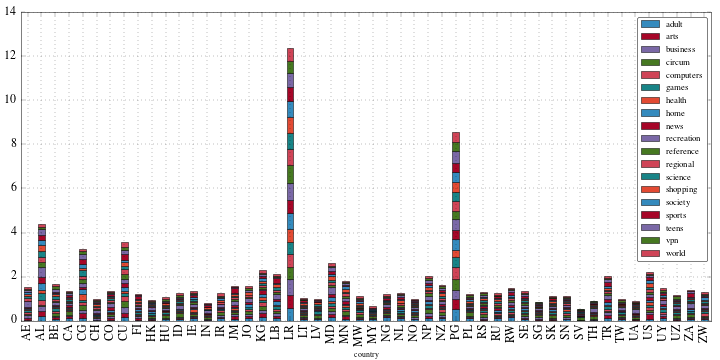

In [84]:
fig1, ax1 = plt.subplots(1,1, figsize=(10,5))
by_subcat_ratio.plot(ax=ax1, kind='bar', stacked=True)
fig1.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(prop={'size':9})
#format_axes(ax1)
fig1.savefig(PLOTS + "stacked_censorship_by_country_subcat_disjoint_dropna")

In [85]:
from matplotlib.lines import Line2D
import random
unfilled_markers = [m for m, func in Line2D.markers.iteritems()
                    if func != 'nothing' and m not in Line2D.filled_markers]
#unfilled_markers = sorted(unfilled_markers)[::-1]  # Reverse-sort for pretty

<IPython.core.display.Javascript object>


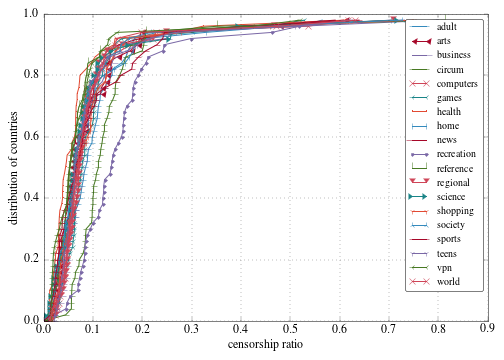

In [88]:
fig1, ax1 = plt.subplots(1,1, figsize=(7,5))

for col in by_subcat_ratio.columns:
    xdata = by_subcat_ratio[col].copy()
    xdata.sort()
    ydata = [float(x) / float(len(xdata)) for x in range(len(xdata))]
    ax1.plot(xdata,ydata, label=col, marker=random.choice(unfilled_markers))
    
fig1.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(prop={'size':10})
ax1.grid(1)
ax1.set_xlabel("censorship ratio", size=12)
ax1.set_ylabel("distribution of countries", size=12)
fig1.tight_layout()
#format_axes(ax1)
fig1.savefig(PLOTS + "CDF_censorship_by_country_subcat_disjoint_dropna")

## DISJOINT ALL (no valid filter)

In [89]:
by_subcat_total = by_country['total'].unstack().T
by_subcat_unknown = by_country['unknown'].unstack().T
by_subcat_censor = by_country['censor'].unstack().T
by_subcat_ratio = (by_subcat_censor/ (by_subcat_total-by_subcat_unknown) )

<IPython.core.display.Javascript object>


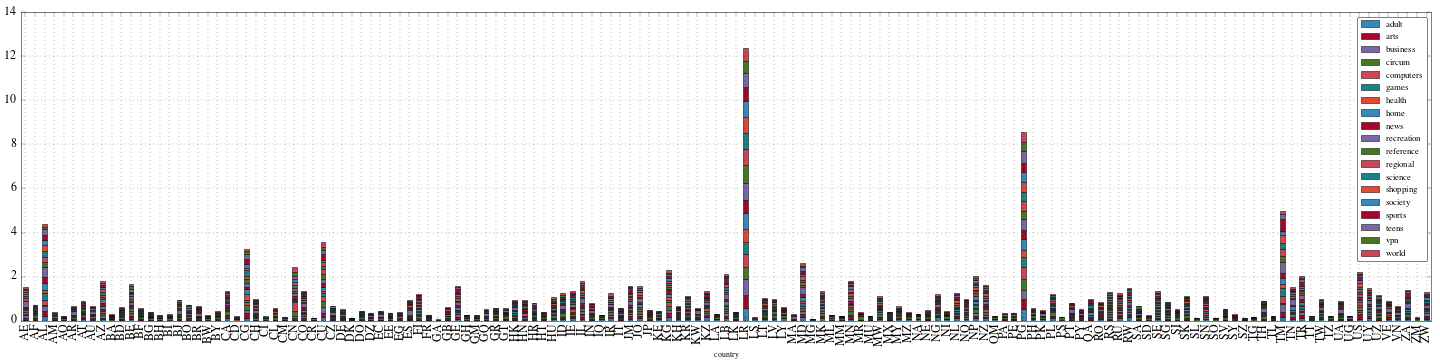

In [90]:
fig1, ax1 = plt.subplots(1,1, figsize=(20,5))
by_subcat_ratio.plot(ax=ax1, kind='bar', stacked=True)
fig1.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(prop={'size':9})
#format_axes(ax1)
fig1.savefig(PLOTS + "stacked_censorship_by_country_subcat_disjoint_all")

<IPython.core.display.Javascript object>


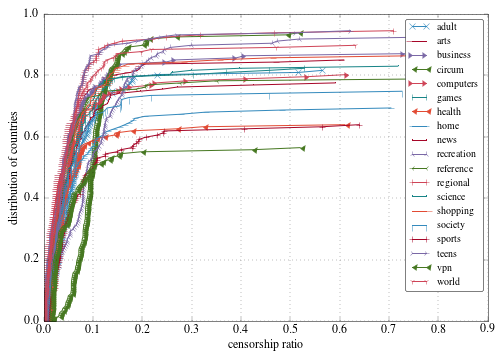

In [92]:
fig1, ax1 = plt.subplots(1,1, figsize=(7,5))

for col in by_subcat_ratio.columns:
    xdata = by_subcat_ratio[col].copy()
    xdata.sort()
    ydata = [float(x) / float(len(xdata)) for x in range(len(xdata))]
    ax1.plot(xdata, ydata, label=col, marker=random.choice(unfilled_markers))
    
fig1.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(prop={'size':10})
ax1.grid(1)
ax1.set_xlabel("censorship ratio", size=12)
ax1.set_ylabel("distribution of countries", size=12)
#ax1.set_xlim([0,150])
fig1.tight_layout()
#format_axes(ax1)
fig1.savefig(PLOTS + "CDF_censorship_by_country_subcat_disjoint_all")

## UNSHARED ALL (no valid filter)

In [93]:
df = df_final[['sIP', 'country', 'case']].merge(df_sIP_subcat_unshared, on=['sIP'])

by_country = pd.DataFrame( {'censor': df[df['case'].isin([1,3])].groupby(['subcat', 'country'])['domain'].count() } )
by_country['total'] = df.groupby(['subcat', 'country'])['domain'].count()
by_country['unknown'] =  df[df['case'].isin([0,4])].groupby(['subcat', 'country'])['domain'].count()
by_country['known'] = by_country['total'] - by_country['unknown']
by_country['censorship (%known)'] = by_country['censor']/by_country['known']
by_country['unknown (%total)'] = by_country['unknown']/by_country['total']

by_subcat_total = by_country['total'].unstack().T
by_subcat_unknown = by_country['unknown'].unstack().T
by_subcat_censor = by_country['censor'].unstack().T
by_subcat_ratio = (by_subcat_censor/ (by_subcat_total-by_subcat_unknown) )


<IPython.core.display.Javascript object>


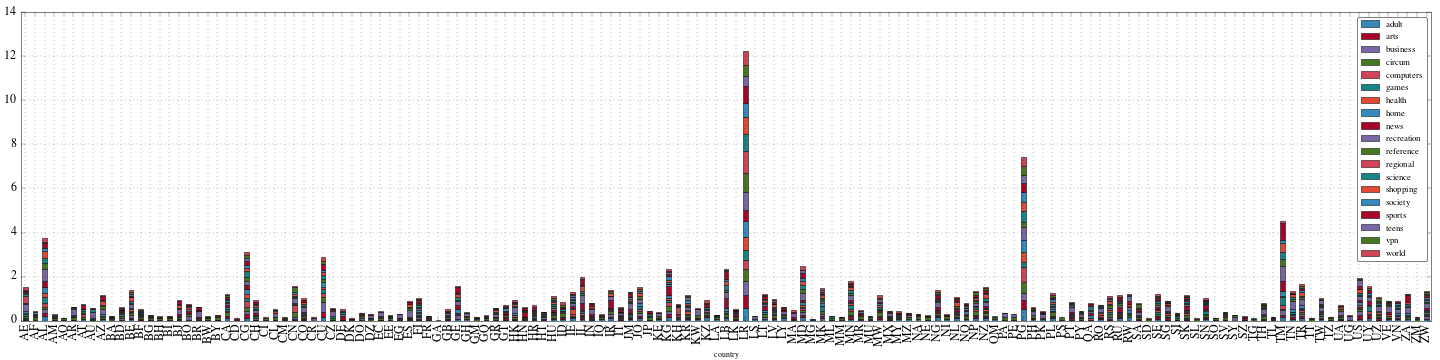

In [94]:

fig1, ax1 = plt.subplots(1,1, figsize=(20,5))
by_subcat_ratio.plot(ax=ax1, kind='bar', stacked=True)
fig1.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(prop={'size':9})
#format_axes(ax1)
fig1.savefig(PLOTS + "stacked_censorship_by_country_subcat_unshared_all")

<IPython.core.display.Javascript object>


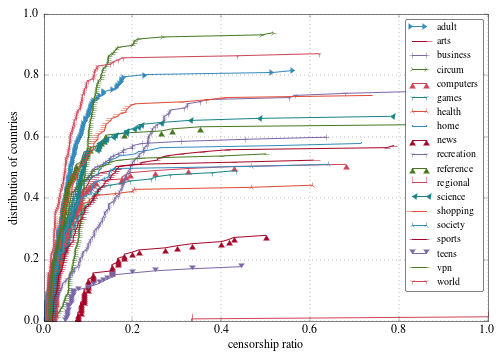

In [95]:
fig1, ax1 = plt.subplots(1,1, figsize=(7,5))

for col in by_subcat_ratio.columns:
    xdata = by_subcat_ratio[col].copy()
    xdata.sort()
    ydata = [float(x) / float(len(xdata)) for x in range(len(xdata))]
    ax1.plot(xdata,ydata, label=col, marker=random.choice(unfilled_markers))
    
fig1.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(prop={'size':10})
ax1.grid(1)
ax1.set_xlabel("censorship ratio", size=12)
ax1.set_ylabel("distribution of countries", size=12)
fig1.tight_layout()
#format_axes(ax1)
fig1.savefig(PLOTS + "CDF_censorship_by_country_subcat_unshared_all")